In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
dataset = pd.read_csv('diabetic_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
dataset.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
dataset.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
empty_values = dataset.isnull().sum()
empty_values

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
dataset_filled = dataset.apply(lambda x: x.fillna(x.mode()[0]))

In [8]:
missing_values = dataset.isnull().sum()

In [10]:
missing_values = dataset.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
for column_name in missing_columns.index:
    print(f"{column_name}:")
    print(dataset[column_name])
    print()

Columns with missing values:
max_glu_serum:
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
101761    NaN
101762    NaN
101763    NaN
101764    NaN
101765    NaN
Name: max_glu_serum, Length: 101766, dtype: object

A1Cresult:
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
101761     >8
101762    NaN
101763    NaN
101764    NaN
101765    NaN
Name: A1Cresult, Length: 101766, dtype: object



In [11]:
label_encoder = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = label_encoder.fit_transform(dataset[column])

In [12]:
scaler = StandardScaler()

In [13]:
scaled_data = scaler.fit_transform(dataset)

In [14]:
scaled_dataset = pd.DataFrame(scaled_data, columns=dataset.columns)

In [15]:
scaled_dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,-1.587330,-1.191545,0.427557,-0.927397,-3.824600,-0.166818,2.750800,4.031022,-1.169873,-1.137649,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,-1.829868,0.83688
1,-1.608075,0.033564,0.427557,-0.927397,-3.197277,-0.166818,-0.708461,-0.514312,0.306482,-0.467653,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,-0.62497
2,-1.608901,0.819654,-1.703706,-0.927397,-2.569954,-0.166818,-0.708461,-0.514312,0.306482,-0.802651,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0.83688
3,-1.604653,0.726480,0.427557,1.078031,-1.942632,-0.166818,-0.708461,-0.514312,0.306482,-0.802651,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0.83688
4,-1.609366,-0.305227,0.427557,1.078031,-1.315309,-0.166818,-0.708461,-0.514312,0.306482,-1.137649,...,0.0,0.708792,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0.83688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,2.714794,1.184409,-1.703706,1.078031,0.566659,-0.166818,-0.708461,-0.135535,0.306482,-0.467653,...,0.0,-1.675583,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,-0.62497
101762,2.714796,0.526249,-1.703706,-0.927397,1.193982,-0.166818,-0.708461,0.053854,-0.185636,0.202343,...,0.0,0.708792,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0.83688
101763,2.714858,-0.342194,0.427557,1.078031,0.566659,-0.166818,-0.708461,-0.514312,0.306482,-1.137649,...,0.0,-1.675583,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0.83688
101764,2.714888,-0.584986,0.427557,-0.927397,1.193982,-0.166818,-0.016609,-0.135535,0.306482,1.877333,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0.83688


In [16]:
n_components = 3
pca = PCA(n_components=n_components)

In [17]:
pca_result = pca.fit_transform(dataset)

In [18]:
pca_dataset = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

In [19]:
pca_dataset

,PC1,PC2,PC3
0,-1.689716e+08,1.088791e+07,429.686153
1,-1.611039e+08,-3.591015e+07,-205.716300
2,-1.548027e+08,-6.566916e+07,458.807279
3,-1.551331e+08,-6.205246e+07,-35.907811
4,-1.639849e+08,-2.312002e+07,-258.866776
...,...,...,...
101761,2.820590e+08,1.366933e+07,-56.410640
101762,2.767141e+08,3.857041e+07,205.237603
101763,2.696674e+08,7.142873e+07,-134.123347
101764,2.676985e+08,8.061524e+07,367.663158


In [20]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HI\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Elbow Method to determine the number of clusters to be formed:


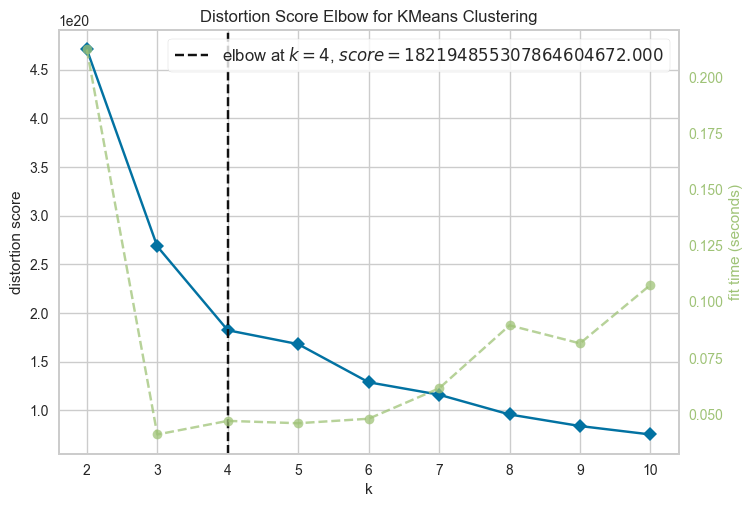

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_dataset)
Elbow_M.show()

In [22]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [23]:
kmeans.fit(pca_dataset)
pca_dataset['Cluster'] = kmeans.labels_
pca_dataset['Cluster'] = kmeans.fit_predict(pca_dataset)

In [24]:
print(pca_dataset.columns)

Index(['PC1', 'PC2', 'PC3', 'Cluster'], dtype='object')


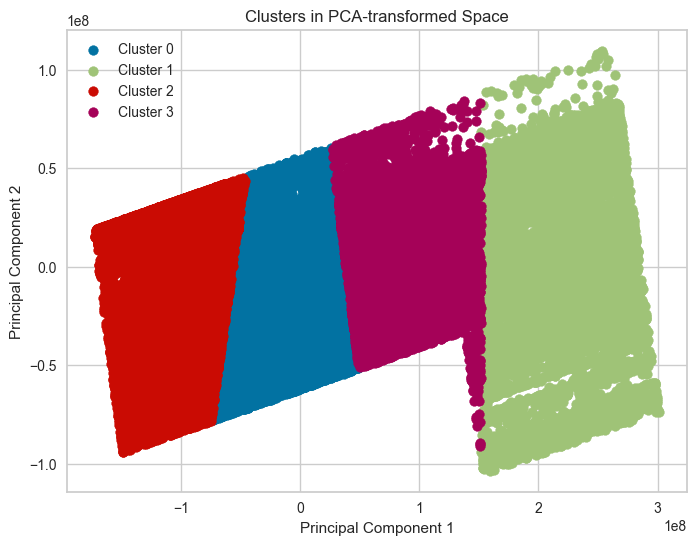

In [25]:
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = pca_dataset[pca_dataset['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('Clusters in PCA-transformed Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import silhouette_score

# Assuming 'kmeans' is your KMeans model and 'pca_dataset' is your dataset after PCA transformation
labels = kmeans.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(pca_dataset, labels)

# Print silhouette score
print("The average silhouette_score is:", silhouette_avg)


The average silhouette_score is: 0.46480701818376197
